
# 📘 Chapter 7: Naive Bayes

This chapter introduces **Naive Bayes (NB)**, a family of fast probabilistic classifiers. The exposition follows a third-person, textbook style with clear LaTeX and runnable examples.



## 7.1 Bayes' Theorem

For events \(A\) and \(B\) with \(P(B) > 0\), Bayes' theorem states:
$$
P(A \mid B) \;=\; \frac{P(B \mid A)\,P(A)}{P(B)}.
$$

In classification with class label \(y \in \{1,\dots,K\}\) and features \(x\),
$$
P(y \mid x) \;\propto\; P(x \mid y)\,P(y).
$$
The **Bayes classifier** assigns the class with maximal posterior probability:
$$
\hat{y}(x) \;=\; \arg\max_{y} \; P(x \mid y)\,P(y).
$$



## 7.2 The Naive Conditional Independence Assumption

Naive Bayes assumes **conditional independence** of features given the class:
$$
P(x \mid y) \;=\; \prod_{j=1}^{d} P(x_j \mid y).
$$
Therefore the decision rule becomes
$$
\hat{y}(x) \;=\; \arg\max_{y} \; P(y)\,\prod_{j=1}^{d} P(x_j \mid y).
$$
In log-space (for numerical stability),
$$
\hat{y}(x) \;=\; \arg\max_{y} \Big( \log P(y) + \sum_{j=1}^{d} \log P(x_j \mid y) \Big).
$$



## 7.3 Common Naive Bayes Variants

- **Gaussian NB** (continuous features). Each feature is modeled as a class‑conditional Gaussian:
  $$
  x_j \mid y=k \sim \mathcal{N}(\mu_{jk},\,\sigma_{jk}^2).
  $$

- **Multinomial NB** (counts / word frequencies). Appropriate for bag‑of‑words text features:
  $$
  P(x \mid y=k) \;\propto\; \prod_{j=1}^{d} \theta_{jk}^{\,x_j}, \quad \text{with } \sum_{j}\theta_{jk}=1.
  $$

- **Bernoulli NB** (binary features). Suited for presence/absence indicators:
  $$
  P(x \mid y=k) \;=\; \prod_{j=1}^{d} \theta_{jk}^{\,x_j}\,(1-\theta_{jk})^{(1-x_j)}.
  $$



## 7.4 Prior, Likelihood, and Smoothing

- **Prior** $(P(y)$): class frequency estimate.  
- **Likelihood** $(P(x_j \mid y)$): class‑conditional feature model.  
- **Laplace / Add‑$(\alpha$) smoothing** avoids zero probabilities (especially in text):
  $$
  \hat{\theta}_{jk} \;=\; \frac{N_{jk} + \alpha}{N_{k} + \alpha\,d},
  $$
where $(N_{jk}$) is the count of feature $(j$) in class $(k$), $(N_k$) is the total count over features for class $(k$), $(d$) is the number of features, and $(\alpha > 0$) (often $(\alpha=1$)).



## 7.5 Strengths and Limitations

**Strengths**  
- Extremely fast to train and predict.  
- Low memory footprint.  
- Strong baseline for text classification.

**Limitations**  
- Independence assumption rarely holds exactly.  
- Continuous features may not be Gaussian.  
- Can be outperformed by more flexible models on complex data.



## 7.6 Hands‑On A: Gaussian Naive Bayes on Iris

This example fits **GaussianNB** on the Iris dataset and reports accuracy and a confusion matrix.


Accuracy: 0.9666666666666667

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


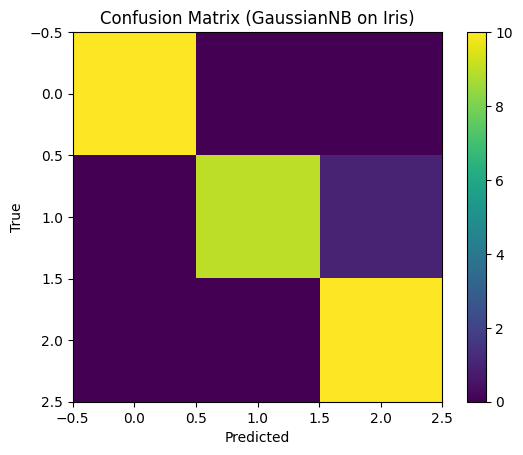

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate
y_pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: simple confusion matrix heatmap (standalone figure, default style)
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix (GaussianNB on Iris)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()



## 7.7 Hands‑On B: Multinomial NB on a Tiny Text Corpus

A miniature example demonstrates **MultinomialNB** on a small bag‑of‑words corpus created in‑notebook (no external downloads). The corpus has two classes.


In [2]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Tiny corpus with two classes: 'tech' (1) and 'food' (0)
docs = [
    "python code and algorithms",
    "neural networks and machine learning",
    "pandas and numpy for data analysis",
    "delicious pizza with fresh tomato",
    "tasty pasta and tomato sauce",
    "homemade bread and cheese"
]
labels = [1, 1, 1, 0, 0, 0]  # 1=tech, 0=food

# Vectorize + MultinomialNB pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=1.0))
model.fit(docs, labels)

# Test on a few samples
test_docs = [
    "learn python and numpy",
    "fresh tomato pasta",
    "cheese pizza recipe",
    "machine learning algorithms"
]
y_pred = model.predict(test_docs)

print("Predictions for test docs:", y_pred)

# Quick holdout-style check (not rigorous due to tiny dataset)
acc = accuracy_score(labels, model.predict(docs))
print("Training accuracy on tiny corpus (for illustration):", acc)


Predictions for test docs: [1 0 0 1]
Training accuracy on tiny corpus (for illustration): 1.0



## 7.8 Summary

- Naive Bayes applies Bayes' theorem with a **conditional independence** assumption.  
- Gaussian, Multinomial, and Bernoulli NB address continuous, count‑based, and binary features respectively.  
- Smoothing prevents zero probabilities; log‑space stabilizes computation.  
- Despite its simplicity, NB remains a competitive baseline, especially for text.

